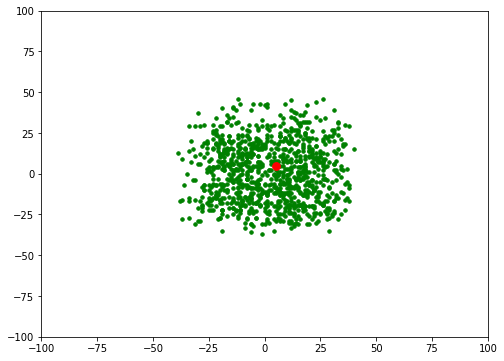

In [1]:
import numpy as np
import matplotlib.pyplot as plt
  
# specifying the size for each and 
# every matplotlib plot globally
plt.rcParams['figure.figsize'] = [8, 6] 
  
# defining list objects with range of the graph
x1_range = [-100, 100]
x2_range = [-100, 100]
  
# empty list object to store the population
population = []
  
# this function is used to generate the population
# and appending it to the population list defined above
# it takes the attributes as no. of features in a 
# population and size that we have in it
def populate(features, size = 1000):
      
    # here we are defining the coordinate 
    # for each entity in a population
    initial = [] 
      
    for _ in range(size):
        entity = []
        for feature in features:
              
            # this * feature variable unpacks a list 
            # or tuple into position arguments.
            val = np.random.randint(*feature)
            entity.append(val)
        initial.append(entity)
      
    return np.array(initial)
  
# defining the virus in the form of numpy array
virus = np.array([5, 5])
  
# only the 100 fit ones will survive in this one
def fitness(population, virus, size = 100):
      
    scores = []
      
    # enumerate also provides the index as for the iterator
    for index, entity in enumerate(population): 
        score = np.sum((entity-virus)**2)
        scores.append((score, index))
      
    scores = sorted(scores)[:size]
      
    return np.array(scores)[:, 1]
  
# this function is used to plot the graph
def draw(population, virus):
    plt.xlim((-100, 100))
    plt.ylim((-100, 100))
    plt.scatter(population[:, 0], population[:, 1], c ='green', s = 12)
    plt.scatter(virus[0], virus[1], c ='red', s = 60) 
      
      
def reduction(population, virus, size = 100):
      
    # only the index of the fittest ones
    # is returned in sorted format
    fittest = fitness(population, virus, size) 
  
    new_pop = []
      
    for item in fittest:
        new_pop.append(population[item])
          
    return np.array(new_pop)
  
# cross mutation in order to generate the next generation
# of the population which will be more immune to virus than previous
def cross(population, size = 1000):
      
    new_pop = []
      
    for _ in range(size):
        p = population[np.random.randint(0, len(population))]
        m = population[np.random.randint(0, len(population))]
      
        # we are only considering half of each 
        # without considering random selection
        entity = []
        entity.append(*p[:len(p)//2])
        entity.append(*m[len(m)//2:])
          
        new_pop.append(entity)
      
    return np.array(new_pop)
  
# generating and adding the random features to
# the entity so that it looks more distributed
def mutate(population):
      
    return population + np.random.randint(-10, 10, 2000).reshape(1000, 2)
  
  
# the complete cycle of the above steps
population = populate([x1_range, x2_range], 1000)
  
# gens is the number of generation
def cycle(population, virus, gens = 1): 
      
    # if we change the value of gens, we'll get 
    # next and genetically more powerful generation
    # of the population
    for _ in range(gens):
        population = reduction(population, virus, 100)
        population = cross(population, 1000)
        population = mutate(population)
          
    return population
  
population = cycle(population, virus)
  
draw(population, virus)